In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Загрузка CIFAR-10 датасета
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Нормализация изображений
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Преобразование меток в one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Создание объекта ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

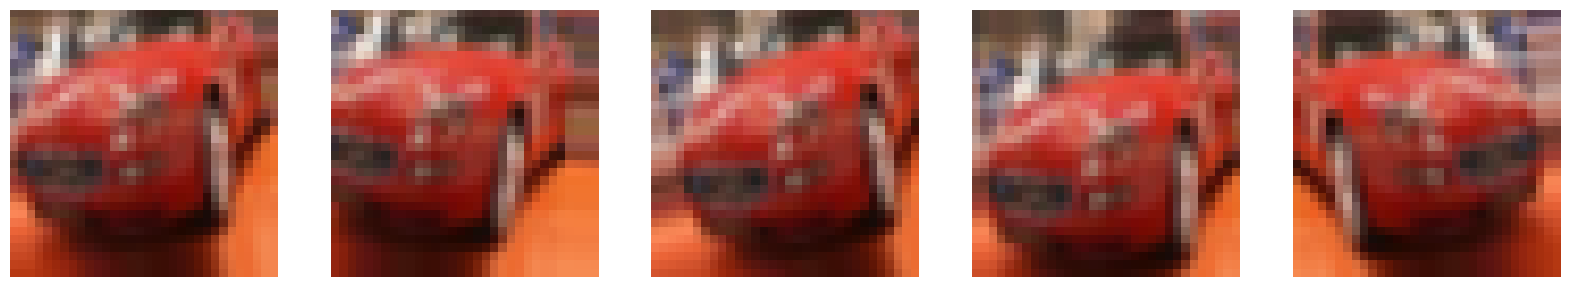

In [ ]:
# Генерация аугментированных изображений
augmented_images = [train_images[5] for i in range(5)]
augmented_images = np.array(augmented_images)
augmented_images = datagen.flow(augmented_images, batch_size=5, shuffle=False).next()

# Визуализация изображений
fig, axarr = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    axarr[i].imshow(augmented_images[i])
    axarr[i].axis('off')

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

# Определение структуры модели
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)), # Сверточный слой с 64 фильтрами
    MaxPooling2D((2, 2)), # Слой пулинга
    Conv2D(128, (3, 3), activation='relu'), # Следующий сверточный слой с 128 фильтрами
    MaxPooling2D((2, 2)), # Слой пулинга
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(), # Преобразование матрицы признаков в вектор
    Dense(64, activation='relu'), # Полносвязный слой
    Dense(10, activation='softmax') # Выходной слой с 10 нейронами (по количеству классов в CIFAR-10)
])

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Определение каллбека
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=1e-6) # Reduce learning rate when a metric has stopped improving.

# Добавление TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Обучение модели
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          steps_per_epoch=len(train_images) / 32,
          epochs=100,
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping, reduce_lr, tensorboard_callback])

Epoch 1/100
1562/1562 [==============================] - 206s 131ms/step - loss: 1.6541 - accuracy: 0.3896 - val_loss: 1.3286 - val_accuracy: 0.5214 - lr: 0.0010
Epoch 2/100
1562/1562 [==============================] - 192s 123ms/step - loss: 1.3305 - accuracy: 0.5192 - val_loss: 1.1634 - val_accuracy: 0.5797 - lr: 0.0010
Epoch 3/100
1562/1562 [==============================] - 192s 123ms/step - loss: 1.2139 - accuracy: 0.5659 - val_loss: 1.0688 - val_accuracy: 0.6179 - lr: 0.0010
Epoch 4/100
1562/1562 [==============================] - 195s 125ms/step - loss: 1.1332 - accuracy: 0.5964 - val_loss: 1.0728 - val_accuracy: 0.6174 - lr: 0.0010
Epoch 5/100
1562/1562 [==============================] - 189s 121ms/step - loss: 1.0732 - accuracy: 0.6226 - val_loss: 1.1133 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 6/100
1562/1562 [==============================] - 191s 122ms/step - loss: 1.0346 - accuracy: 0.6339 - val_loss: 0.9326 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 7/100
1562/1562 [=====

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

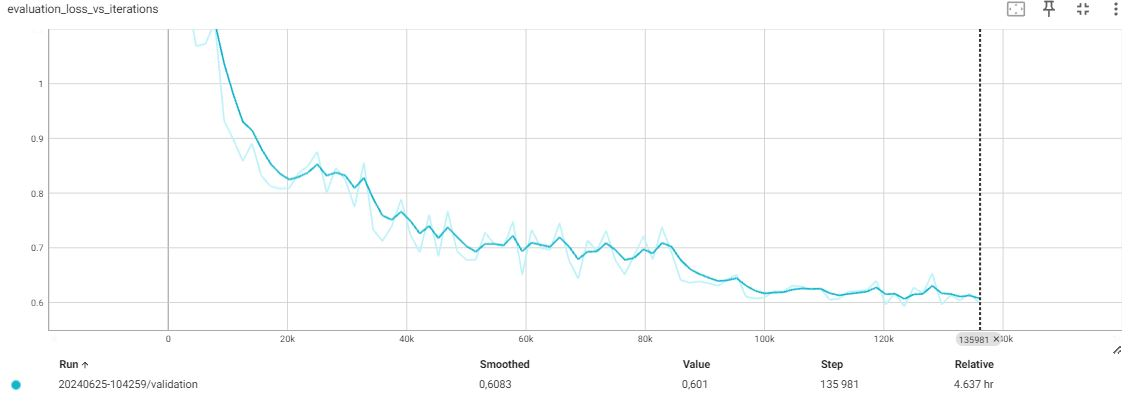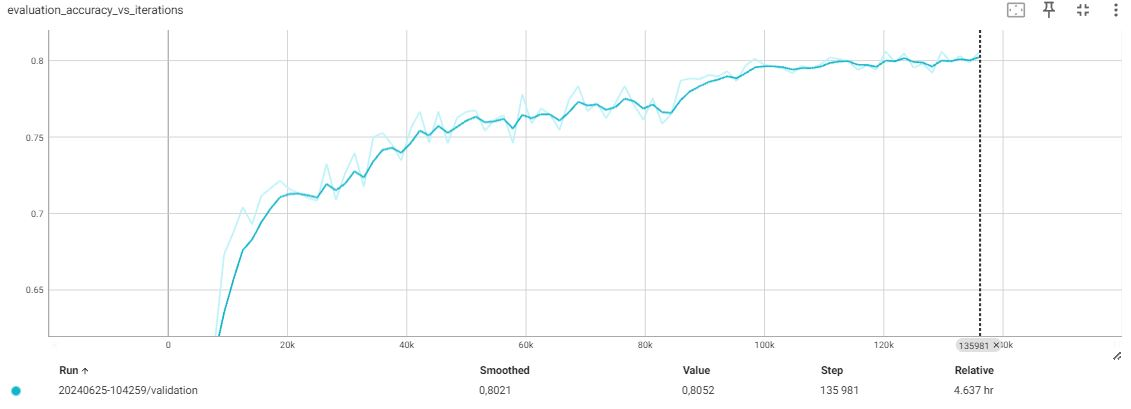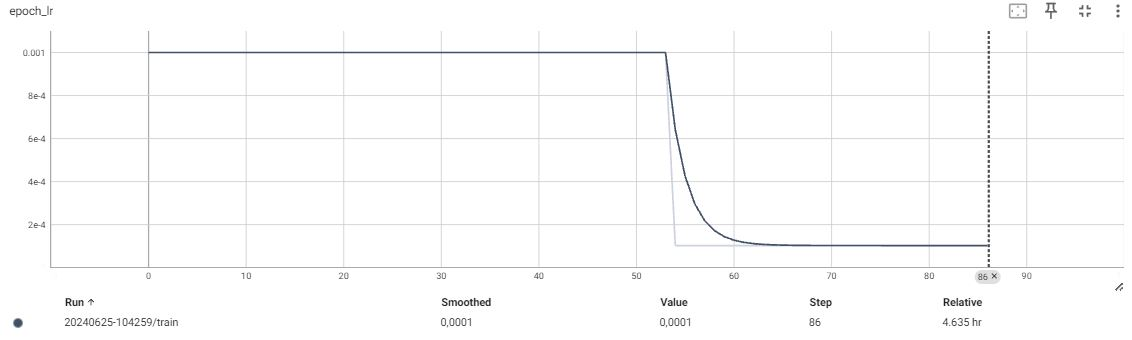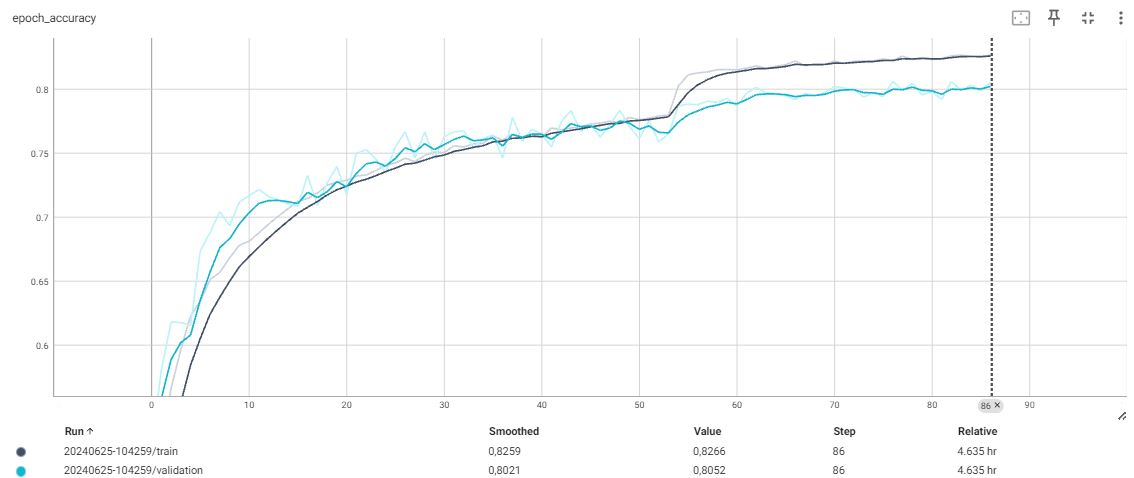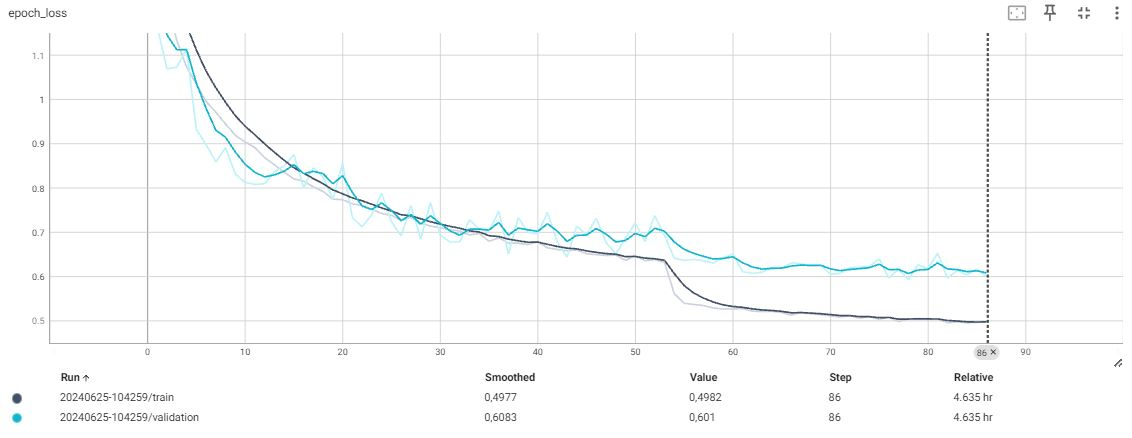

In [ ]:
y_pred = model.predict(test_images)

313/313 [==============================] - 9s 26ms/step


In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(test_labels, axis=-1)
# Получаем отчет о классификации
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.87      0.94      0.90      1000
           2       0.77      0.68      0.72      1000
           3       0.76      0.54      0.63      1000
           4       0.80      0.79      0.79      1000
           5       0.75      0.73      0.74      1000
           6       0.80      0.90      0.85      1000
           7       0.80      0.88      0.84      1000
           8       0.89      0.86      0.88      1000
           9       0.82      0.91      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



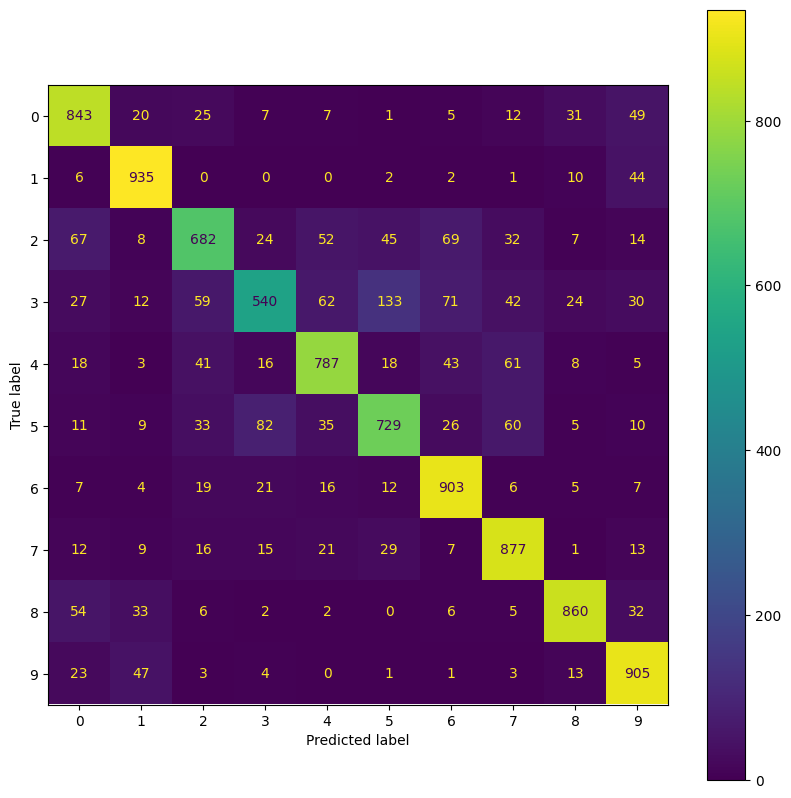

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Вычисляем confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Визуализируем confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).plot(ax=ax)
plt.show()